# Project 2019 Programming for Data Analysis

* Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.<br>
* Investigate the types of variables involved, their likely distributions, and their relationships with each other<br>
* Synthesise/simulate a data set as closely matching their properties as possible.<br>
* Detail your research and implement the simulation in a Jupyter notebook – the data set itself can simply be displayed in an output cell within the notebook.<br>


# Section 1

# Choose a real-world phenomenon that can be measured and for which you could collect at least one-hundred data points across at least four different variables.

For this project, I have selected a dataset that is available from the Irish Government's open data project to research, investigate then simulate some of the variables.<br>
The Open Data project is an initiative by the government of Ireland that makes data held by public bodies available and easily accessible online for reuse and redistribution to create interest and encourage engagement with open data.<br>
I have chosen the [Office of Public Works Heritage Site Details](https://www.opw.ie/en/media/opw-heritage-site-details.csv) open dataset which contains one hundred data points across twenty-four variables and was collected in 2015.<br>
The Office of Public Works (OPW) is a Government department with responsibility for the day-to-day running of all National Monuments in State care and National Historic Properties. <br>

The real-world phenomenon that is presented is a collection of information relating to the Heritage Sites that are open to the public.  <br>
I chose this dataset because it is of interest to me in my professional life. <br>
In the next section of the project I will explore the kinds of variables that appear in a dataset relating to Heritage Sites, the relationships (if any) between variables and the distributions that are apparent.

***

# Section 2

# Investigate the types of variables involved, their likely distributions, and their relationships with each other

**Investigation of the original OPW dataset**

In order to simulate a dataset on the subject of Heritage States owned by the State/ citizens of Ireland I must investigate a pre-existing one.[Office of Public Works Heritage Site Details](https://www.opw.ie/en/media/opw-heritage-site-details.csv)<br>
Considering that the dataset was made available as part of a government initiative to create interest and encourage engagement with open data - it was of poor quality.<br>
* The original dataset is relatively small - 100 records and 24 variables - however, the csv file was un-necessarily large when loading due to the inclusion of digits on line 2424 of the original spreadsheet.
* The financial data - in this case cost of entry for different demographics was put together in one column along with other visitor information. This created difficulties for my investigation.
I have adjusted it separately, re-save this truncated version in this github repository and continued the project with the updated format.


**Observations On The Types of Variables**

The dataset contains information about 100 unique, named Heritage Sites managed by The Office of Public Works collected in 2015.<br>
There are 24 different variables in the original dataset, most of which relate to visitor information e.g. GPS co-ordinates and contact details for the site.
The following points are relevant to this exercise and the objective of synthesising data set in a methodical way which can match the contents.

#### Heritage Site Name
* Every Heritage Site name is a unique object

#### Pricing structures in Euro, Datatype: Integer
* Adult	entrance price - an integer between 0 and 12 
* Senior / Group entrance price	- an integer between 0 and 9 
* Child entrance price - an integer between 0 and 7 
* Student entrance price - an integer between 0 and 8 
* Family entrance price - an integer between 0 and 32 

* 51% of the sites have free admission, 35% have an adult entrance fee of €5.
* When an entrance fee is paid, there is a price point for all types of visitors.
* An individual adult is the most expensive ticket with all others reducing by 1 or 2 euro from that point
* A family ticket is approximately the same price as the sum of two adult plus one child tickets

#### Visitor Numbers, Datatype : Integer
* 2015 Visitor Numbers contain integers that range from 0 - 553,348. As previously state there is a strong relationship between the Region and Visitor Numbers.

* 31 of the entries for 2015 Visitor Numbers contain a null value.
* The remaining 69 datapoints show that visitor numbers range from 1750 to 553348
* The total number of visitors is 5.1 million people


#### Geographical Location, Datatype : Object
* The county where the Heritage Site is located affects the Regional classification, if this information were to be shuffled, the county/region need to be linked.
* There is no relationship between the number of Heritage Sites in a county and the visitor numbers.
* There is a strong relationship between the Region and the Visitor Numbers.
* Instead of joining the county and region, I will therefore omit the county variable entirely my reason for this is because the county variable has no strong relationship with any distribution - the regionality is a stronger one.

Heritage Sites are in 7 different geographical regions, 
* Dublin
* Midlands & East Coast 
* North-West
* Shannon
* South-East
* South-West
* West

The majority of sites are located in Dublin, South - East and South-West.

#### Cafe Facilities, Datatype : Integer
In the original dataset, 9 out of 100 Heritage Sites have a Cafe on site

#### Opening Dates, Datatype : Integer
42 of the sites are open all year round, the remainder have seasonal opening times.


**Likely Distributions in the OPW Heritage Sites Dataset used to inform a synthesised Dataset**

What is the type of distribution that appears and that can be used to inform a synthesised Dataset?<br>
The normal distribution is a very common one and can be considered the standard distribution, therefore I will use it where there is an option in randomly generating variables but most of the simple random data functions in the random library use the uniform distribution.
On two occasions, the binomial distribution is used, further information about this decision appears below.<br>
In addition, the central limit theorem can be used to support my decision to use normal distribution. <br>
This theorem states that the mean of any sample of variables (with finite mean and variance) with any distribution will approximate the normal distribution.

**Relationships in the OPW Heritage Sites Dataset used to inform a synthesised Dataset**

There is a strong relationship between the Region and the Visitor Numbers in the original Dataset.
To me, this is the the most interesting variable in the original dataset.

An assumption coming to the dataset would be that the busiest sites are in the most populous region of the country.
This assumption is born out by Failte Ireland's (the National Tourism Development Authority) 2018 figures where 4 of the top 10 paying visitor attrations are in Dublin with a further two in the South-East. However, other sites on the list are in underpopulated areas e.g. the Cliffs of Moher that are world renowned for their remoteness and unspolit beauty.

I do not expect to be able to recreate this subtle relationship with synthesised data, however the relationships that are produced will be explored in due course.

# Section 3

# Synthesise/simulate a data set as closely matching the properties of the original as is possible.

In [2]:
#Import modules required for the Assignment
#NumPy package
import numpy as np
#Pandas library
import pandas as pd
#Seaborn package
import seaborn as sns
#Matplotlib library
import matplotlib.pyplot as plt

Following on from the findings in Section 2, I will simulate a data set as closely matching their properties as possible using the numpy random package thus building on my [previous work](http://localhost:8888/?token=98bc2512905f44f91efe55dc0b350cacc78b93d3f4e55086) carried out during this course where I explored the numpy random package.<br>
Unless otherwise stated, the scripts come from this project.<br>
I will :
- Permute the 100 Heritage Sites names from the original OPW Datset using random.permutation
- Synthesise 100 variables from the choice of seven Region names using random.choice
- Synthesise random data for the number of visitors from integers that range from 0 - 553,348 using random.randint
- Synthesise random data for the Adult price point variable and ensure that 51 out of the 100 Sites have free entry / zero value using random.randint and permutation<br>
- Synthesise random data for the number of cafes available at Heritage Sites using random.binomial<br>
- Synthesise random data for the opening hours at Heritage sites using random.binomial<br>


Then merge these dataframes into one large dataset that mirrors the original.


### Setting the seed

The term "seed" refers to the starting position of generating pseudo-random numbers.

If the seed is known/set it is possible to predict the pattern because the algorithm will do the same equation and return the same numbers at each iteration. 

The seed will be set in each script to ensure uniformity in the output and so that any any comments or observation on the output will make sense to you, the reader.

### Permute the Heritage Site names and create a new dataframe
It is not possible to randomly generate this text, therefore I will use the selection the provided in the original Dataset that informs this project.

In [4]:
df=pd.read_csv("https://raw.githubusercontent.com/ClodaghMurphy/ProgDA_ProjectDec2019/master/opw-heritage-site-detailsNEW.csv", encoding="ISO-8859–1",nrows=100)

In [5]:
#code adapted from https://stackoverflow.com/questions/49545599/how-to-turn-a-pandas-column-into-array-and-transpose-it
New_Names = df[['Name']]
#Set seed at 19 to ensure identical results at every iteration
np.random.seed(19)
#Permute the synthesised dataframe. Permute is a function from the random package that rearranges an array
#this code ensures the output will be in column format
df1 = pd.DataFrame((np.random.permutation(New_Names)), columns = ['New_Names'])
#df1

### Use .random.choice to produce a 100 row dataframe using the given 7 OPW regions

In [6]:
#The .random.choice function randomly chooses a sample from an array
#Code adapted from https://pynative.com/python-random-sample/
#Provide array of 7 OPW regions as they appear in the original dataset
Regions = (["Dublin", "Midlands & East Coast", "North-West", "Shannon", "South-East", "South-West", "West"])
#Set seed at 19 to ensure identical results at every iteration
np.random.seed(19)
#When 100 is entered into the argument, 100 selections are output
#Calling pd.Dataframe ensures the output is in a datafame format
df2 = pd.DataFrame((np.random.choice(Regions, 100)), columns = ['Region'])
#A uniform distribution is assumed in this function
#df2

### Synthesise random data for the number of visitors from integers that range from 0 - 553348

In [15]:
#Set seed at 19 to ensure identical results at every iteration
np.random.seed(19)
#Code adapted from library documentation https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html
#As per the numpy documentation, this command returns random integers from the “discrete uniform” distribution
df3 = pd.DataFrame((np.random.randint(0, high=553348, size=100, dtype='l')), columns = ['New_Vis_Numbers'])

Instead of forcing a nil amount of Visitors for 31 Heritage Site, I will allow the numpy library to generate data.<br>
My reason for this choice, is that the number of visitors in those sites was not zero - it was simply not collected for various business reasons e.g. the site is a main thoroughfare in the case of St. Stephen's Green. It will be more interesting dataset if these statistics are contained in it.

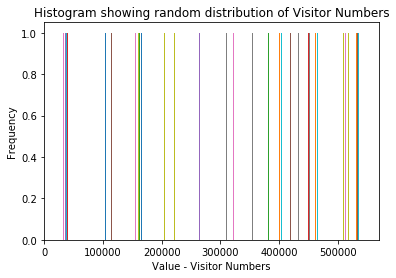

In [31]:
#Code adapted from https://realpython.com/python-histograms/
plt.hist(df3)
plt.xlabel('Value - Visitor Numbers')
plt.ylabel('Frequency')
plt.title('Histogram showing random distribution of Visitor Numbers')
plt.show()

### Synthesise random data for the Adult price point variable and ensure that 51 out of the 100 Sites have free entry / zero value

There are five different categories of visitor in the original dataset
Adult, Senior / Group, Child, Student and Family.<br>
I have focussed on the Adult price because it is the most expensive individual entry price and the other amounts are based on it.

In [24]:
#Set seed at 19 to ensure identical results at every iteration
np.random.seed(19)
#Adult entrance price -  100 integers between 1 and 12 
#0-12 is not used because this would result in some random values of 0
#Code adapted from library documentation https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html
Adult = np.random.randint(1, high=12, size=100, dtype='l')
Adult = pd.DataFrame(Adult)
#Code adapted from https://stats.stackexchange.com/questions/283572/using-iloc-to-set-values/283575
#Replace 51 values with free entry/zero
Adult.loc[0:50,0] = 0
#Permute the synthesised dataframe. Permute is used because shuffle creates a "key error" when used with a dataframe.
df4 = pd.DataFrame(np.random.permutation(Adult), columns = ['Adult'])
#df4


### Synthesise random data for the number of cafes and opening hours at Heritage Sites

In the original dataset, there is lots of visitor information jumbled together in once cell covering facts such as whether there are toilets, parking, wheelchair access and cafes on site or nearby.
From the dataset I extracted that 100 Heritage Sites have a Cafe on site.
Similarly, through scanning through the original data in excel format which goes into great detail about the individual local opening hours I can put the information in a much simpler way - 42 of the sites are open all year round, the remainder have seasonal opening times.
(These investigations are not shown as part of this assignment - only the results.)

One of the learning Outcomes for this module is that I will be able to model real-world problems as computing problems.
I can display this ability through turning this data-intensive information into a Boolean format, i.e.,
The Heritage Site has a Cafe - True/False
The Heritage Site is open all year - True/False

In order to synthesise data to meet the requirements I will use the binomial distribution from the numpy library.
In the assignment that I completed earlier this year, I wrote about the binomial distribution which can be used in any instance repeated multiple times where there are deemed to be two possible outcomes - success or failure.
The "probability of success" input is taken from the findings in the original dataset 9/100 and 42/100 respectively.



In [23]:
#Set seed at 19 to ensure identical results at every iteration
np.random.seed(19)
#Code adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html
n, p = 1, .09  # number of trials, probability of each trial is 9/100
df5 = pd.DataFrame((np.random.binomial(n, p, 100)), columns = ['Cafe'])
#df5

In [22]:
#Set seed at 19 to ensure identical results at every iteration
np.random.seed(19)
#Code adapted from https://docs.scipy.org/doc/numpy-1.15.0/reference/generated/numpy.random.binomial.html
n, p = 1, .42  # number of trials, probability of each trial is 42/100
df6 = pd.DataFrame((np.random.binomial(n, p, 100)), columns = ['Year Round Opening'])
#df6

In [39]:
#Code adapted from https://stackoverflow.com/questions/28135436/concatenate-rows-of-two-dataframes-in-pandas
New_Dataset = pd.concat([df1,df2, df3, df4, df5, df6,], axis=1)
#The following line can be uncommented (remove the # symbol)in order to print the New Dataset.
#New_Dataset

### Summary Data of the New Dataset

In [37]:
New_Dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 6 columns):
New_Names             100 non-null object
Region                100 non-null object
New_Vis_Numbers       100 non-null int32
Adult                 100 non-null int32
Cafe                  100 non-null int32
Year Round Opening    100 non-null int32
dtypes: int32(4), object(2)
memory usage: 3.2+ KB


.info is used to provide a concise summary of the information contained in the New_Dataset DataFrame.<br>
The output above tells me that there are six columns, there are 100 rows of information in each, the datatypes are as expected and the DataFrame uses 3.2KB memory.

In [ ]:
#Print a description of the output
print("Description of the OPW Dataset")
New_Dataset.describe()
#if parentheses ()are not used, all columns will display but no useful summary statistics!

According to pandas 0.25.1 documentation:
> For numeric data, the result’s index will include count, mean, std, min, max as well as lower, 50 and upper percentiles. 
. By default the lower percentile is 25 and the upper percentile is 75. The 50 percentile is the same as the median.

The output confirms that there are 100 data points
A large amount of free sites produces unusual results in many of the columns e.g. the 25% and 50% quartiles are zero across the range.
The standard deviations listed give an indication of the distance between the mean and all values, this figure is affected by the free entrance to over half of the sites in the dataset where tickets prices are concerned.

### Data Visualisation:  Region and Visitor Numbers

Countplot of the Random Choice function applied to 7 OPW Regions


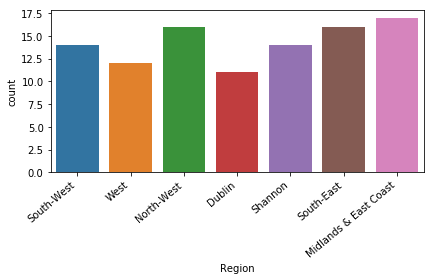

In [32]:
#Print a description of the output
print("Countplot of the Random Choice function applied to 7 OPW Regions")
#Code amended from https://stackoverflow.com/questions/42528921/how-to-prevent-overlapping-x-axis-labels-in-sns-countplot
ax = sns.countplot(x="Region", data=New_Dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
plt.tight_layout()
plt.show()

[Text(0, 0, 'South-West'),
 Text(0, 0, 'West'),
 Text(0, 0, 'North-West'),
 Text(0, 0, 'Dublin'),
 Text(0, 0, 'Shannon'),
 Text(0, 0, 'South-East'),
 Text(0, 0, 'Midlands & East Coast')]

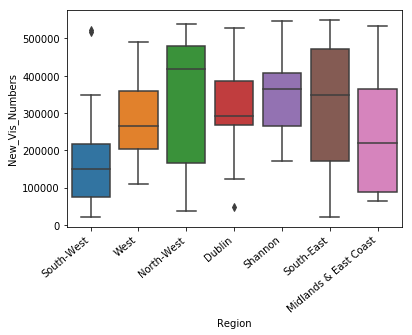

In [33]:
#code adapted from https://seaborn.pydata.org/generated/seaborn.boxplot.html
ax = sns.boxplot(x="Region", y="New_Vis_Numbers", data=New_Dataset)
ax.set_xticklabels(ax.get_xticklabels(), rotation=40, ha="right")
#plt.tight_layout()
#plt.show()

#### Observations on the BoxPlot

* The minimum is represented by the lowermost line (a "whisker")
* The maximum value is the uppermost line (a "whisker")
* The lowermost end of each box is quartile 1, the uppermost represents quartile 3
* The second quartile (the median) is the line inside the box.
* The circles that appear on the plot indicate outliers
* A compact box indicates less variation in the values

The Dataset upon which this project is based indicated a strong relationship between the Region and the Visitor Numbers.
The synthesised data was unable to replicate this nuance and the above boxplot diplays an expected uniform distribution.

### Data Visualisation:  Histograms of all Numerical Data

Data Visualisation - Histograms setting out all numerical data


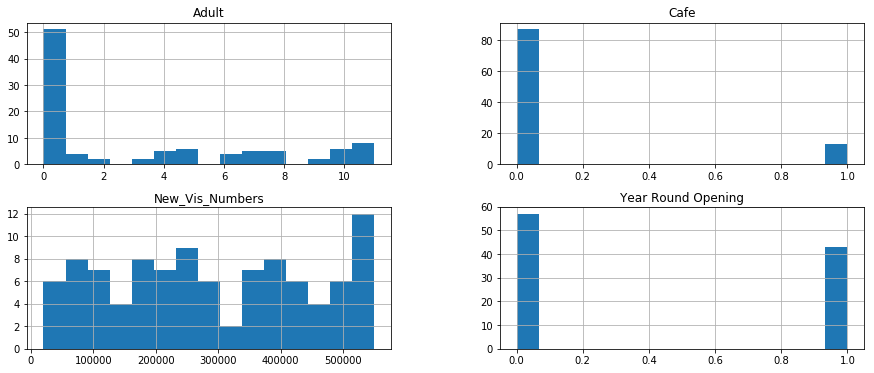

In [35]:
#code adapted from https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d
New_Dataset.hist(bins=15, figsize=(15, 6), layout=(2, 2));
print ("Data Visualisation - Histograms setting out all numerical data")

#### Observations on the Histograms

Adults Entrance Fee / Visitor Numbers

The fact that 51% of Heritage Sites have free entry, skews the distribution somewhat.  
Both the Adult Entrance Fee and Visitor Numbers plots can be seen to have discrete uniform distribution which corresponds with the documentation for that library.

Cafe/Year Round Opening

It is understood that the zero value indicates a false statement and one means the statement is true.
When writing the script to randomly generate numbers regarding the availability of a Cafe on site or Year Round Opening a degree of control was exerted in that the distribution is a fixed binomial distribution. However, the boolean value will be applied to the unique Heritage Site in a random way.
The data visualised in the histograms met those precise requirements.  




### Relationships between Variables - correlation

In Section 2, while still dealing with the original OPW Dataset, I observed a strong relationship between the Region and the Visitor Numbers i.e., that Regions along the eastern seaboard had more visitors and wrote that I did not expect to easily recreate it with synthesised data. 

In Section 3, the synthesised data produced a uniform  distribution wihout any strong relationships between location and visitor numbers.

Correlation is a statistical measure that can be used to describe one variable in terms of its relationship with another.
Covariance is a measure of the association/relationship between two variables X and Y.
The synthesised data does not meet the assumptions that must be met (e.g. normally distributed data) in order to apply Pearson's Correlation (the one that is called by .corr()) however I will run the script as an example of the type of output that can be produced.  

It is straightfoward to call the correlation function (see below) but what do this output mean?
* values around 1 indicates a strong positive relationship
* values around 0 indicates the variables are not linearly correlated
* values around -1 indicate a strong negative relationship

The results below, therefore, indicate no linear correlation/strong negative relationships between the variables.
The value of 1 is output when the same two variables are compared to one another e.g. Cafe and Cafe.


In [36]:
New_Dataset.corr()

,New_Vis_Numbers,Adult,Cafe,Year Round Opening
New_Vis_Numbers,1.000000,0.106445,-0.146040,-0.096163
Adult,0.106445,1.000000,-0.020486,0.123233
Cafe,-0.146040,-0.020486,1.000000,0.445057
Year Round Opening,-0.096163,0.123233,0.445057,1.000000


### Final Observations and Summary of Project

**Choice of phenomenon to explore**.

In this instance, I used a pre-existing DataSet to base the project on.
I observed that there was room for improvement in terms of the quality and layout of the data in it.
I spent some time investigating the variables, relationships and distributions in order to recreate it.

**Software used in the Project**

The libraries/packages used were:
* NumPy package <br>
* Pandas library <br>
* Seaborn package <br>
* Matplotlib library <br>

**Simulation of Data**


Each variable was synthesised separately using a selection of rules which are set out in Section 2.<br>
The following functions from the numpy.random package were used: <br>
* random.choice
* random.permutation
* random.randint
* random.binomial

An argument to have the output in a pandas dataframe format was included in every script.
While I was preparing this Project I printed the output to ensure it was correct.
Once the script was debugged, I "commented" the piece of code so that it will no longer print out the results for every section of simulated data, however, the choice is there for another user.
I chose to do this following on from lecturer feedback in a previous assignment - big tables of data don't convey much information and it is better to carry out analysis/visualisation on the entire dataset later on.

Finally, the pandas concatentate function was called to merge all the new dataframes into one dataset for analysis.


**Investigate the types of variables involved, their likely distributions, and their relationships with each other**

The variables in a dataset produced by the Government Department responsible for the National Monuments of Ireland included many points of interest to a visitor previously mentioned. 
I focussed on a selection that would be easily reproduced:

* Price of Entry, an integer - based on the price points for an adult in 2015
* No. of Visitors to each site,an integer - based on the lowest and highest numbers in 2015
* The seven geographic regions that the sites are dispersed amongst - objects
* Whether or not there is a cafe or year round opening at Heritage Site

The method of generating the random data produced uniform distributions (as shown in histogram and box-plot data visualisations) with the exception of the cafe and opening times where a binomial distibution was used because of the boolean nature of the output.
Over 50% of the Heritage Sites are free to enter, I felt it was important to include this value in the synthesised data which produced interesting data visualisations.

I used the correlation function in pandas to investigate if there were any strong relationships between the variables- there was not.

***

## References used in completing the project

Assignment 2019 for Programming for Data Analysis module, GMIT. [Online] <br>
Available on: https://github.com/ClodaghMurphy/Assignment-2019-progda [viewed 26 november 2019]<br>

Concatenate rows of two dataframes in pandas [Online]<br>
Available on:  https://stackoverflow.com/questions/28135436/concatenate-rows-of-two-dataframes-in-pandas [viewed 8 December 2019]<br>

Dan Friedman's Data Science Knowledge Base[Online]<br>
Available on: https://dfrieds.com/   [viewed 30 November 2019]<br>

Failte Ireland: Key Tourism Facts 2018 [Online] <br>
Available on:  https://www.failteireland.ie/FailteIreland/media/WebsiteStructure/Documents/3_Research_Insights/Key-Tourism-Facts-2018.pdf?ext=.pdf [viewed 13 December 2019 <br>

How do I fix a Unicode error while reading a CSV file with a pandas library in Python 3.6? [Online]<br>
Available on: https://www.quora.com/How-do-I-fix-a-Unicode-error-while-reading-a-CSV-file-with-a-pandas-library-in-Python-3-6 [viewed 26 November 2019]<br>

How to convert Numpy array to Panda DataFrame  [Online]<br>
https://stackoverflow.com/questions/53816008/how-to-convert-numpy-array-to-panda-dataframe [viewed 8 December 2019]<br>

How to Perform Exploratory Data Analysis with Seaborn  [Online]<br>
Available on: https://towardsdatascience.com/how-to-perform-exploratory-data-analysis-with-seaborn-97e3413e841d  [viewed 30 November 2019]<br>

Introduction to Correlation [Online] <br>
Available on : https://blogs.oracle.com/datascience/introduction-to-correlation [viewed 13 December 2019]

Normal Distribution [Online] <br>
Available on: http://mathworld.wolfram.com/NormalDistribution.html [viewed 7 December 2019]<br>

Normal distributions review [Online]<br>
Available on: https://www.khanacademy.org/math/statistics-probability/modeling-distributions-of-data/normal-distributions-library/a/normal-distributions-review   [viewed 7 December 2019]<br>

OPW OPEN DATA SETS   [Online]<br>
Available on: https://www.opw.ie/en/opendata/#d.en.34620 [viewed 26 November 2019]<br>

pandas concat [Online]<br>
https://pandas.pydata.org/pandas-docs/version/0.23.4/generated/pandas.concat.html  [viewed 8 December 2019]

Python Histogram Plotting: NumPy, Matplotlib, Pandas & Seaborn [Online] <br>
Available on: https://realpython.com/python-histograms/ [viewed 14 December 2019] <br>

Python random.sample() function to Choose multiple items from list [Online] <br>
Available on: https://pynative.com/python-random-sample/ [viewed 30 november 2019] <br>

Random sampling (numpy.random) [online] <br>
Available on: https://docs.scipy.org/doc/numpy-1.15.0/reference/routines.random.html [viewed 3 December 2019]<br>

The Engineering World Pearson Correlation - Parametric Methods in Pandas and Scipy in Python - Tutorial 14 [Online] <br>
Available on : https://www.youtube.com/watch?v=sCkS-0kIRCE [viewed 13 December 2019]

The Pandas DataFrame – loading, editing, and viewing data in Python  [Online]<br>
Available on: https://www.shanelynn.ie/using-pandas-dataframe-creating-editing-viewing-data-in-python/ [viewed 26 November 2019]<br>

Using iloc to set values [Online]<br>
Available on: https://stats.stackexchange.com/questions/283572/using-iloc-to-set-values/283575  [viewed 7 December 2019]<br>




End